In [1]:
import pymc3 as pm
import numpy as np
%matplotlib inline
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
import scipy.stats as stats
figsize(12.5, 4)


true_A = 250
true_B = 272
true_C = 157

N_A = 3012
N_B = 3066
N_C = 3109

true_p_A = true_A/float(N_A)
true_p_B = true_B/float(N_B)
true_p_C = true_C/float(N_C)

observations_A = stats.bernoulli.rvs(true_p_A, size=N_A)
observations_B = stats.bernoulli.rvs(true_p_B, size=N_B)
observations_C = stats.bernoulli.rvs(true_p_C, size=N_C)

print("true p_A:", true_p_A)
print("true p_B:", true_p_B)
print("true p_C:", true_p_C, "\n")

print("Obs from Site A: ", observations_A[:30], "...")
print("Obs from Site B: ", observations_B[:30], "...")
print("Obs from Site C: ", observations_C[:30], "...")

print(np.mean(observations_A))
print(np.mean(observations_B))
print(np.mean(observations_C))

print(np.sum(observations_A))
print(np.sum(observations_B))
print(np.sum(observations_C))


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


true p_A: 0.08300132802124834
true p_B: 0.08871493803000652
true p_C: 0.05049855258925699 

Obs from Site A:  [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0] ...
Obs from Site B:  [0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] ...
Obs from Site C:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] ...
0.0730411686587
0.0906718851924
0.0572531360566
220
278
178


In [2]:
with pm.Model() as model:
    p_A = pm.Uniform("p_A", 0, 1)
    p_B = pm.Uniform("p_B", 0, 1)
    p_C = pm.Uniform("p_C", 0, 1)
    
    # Define the deterministic delta function. This is our unknown of interest.
    delta_A_B = pm.Deterministic("delta_A_B", p_A - p_B)
    delta_A_C = pm.Deterministic("delta_A_C", p_A - p_C)
    delta_B_C = pm.Deterministic("delta_B_C", p_B - p_C)
    
    # Set of observations, in this case we have three observation datasets.
    obs_A = pm.Bernoulli("obs_A", p_A, observed=observations_A)
    obs_B = pm.Bernoulli("obs_B", p_B, observed=observations_B)
    obs_C = pm.Bernoulli("obs_C", p_C, observed=observations_C)

    step = pm.Metropolis()
    trace = pm.sample(20000, step=step)
    burned_trace=trace[1000:]

100%|██████████| 20500/20500 [00:36<00:00, 564.49it/s]


In [3]:
p_A_samples = burned_trace["p_A"]
p_B_samples = burned_trace["p_B"]
p_C_samples = burned_trace["p_C"]
delta_A_B_samples = burned_trace["delta_A_B"]
delta_A_C_samples = burned_trace["delta_A_C"]
delta_B_C_samples = burned_trace["delta_B_C"]

print(p_A_samples)
print(p_B_samples)
print(p_C_samples)
print(delta_A_B_samples)
print(delta_A_C_samples)
print(delta_B_C_samples)

[ 0.07889667  0.07889667  0.07889667 ...,  0.0740473   0.0740473   0.0740473 ]
[ 0.09096684  0.09096684  0.09096684 ...,  0.09741949  0.09741949
  0.09741949]
[ 0.06239818  0.06239818  0.06019948 ...,  0.05439382  0.05439382
  0.05439382]
[-0.01207016 -0.01207016 -0.01207016 ..., -0.02337219 -0.02337219
 -0.02337219]
[ 0.01649849  0.01649849  0.01869719 ...,  0.01965348  0.01965348
  0.01965348]
[ 0.02856865  0.02856865  0.03076735 ...,  0.04302566  0.04302566
  0.04302566]


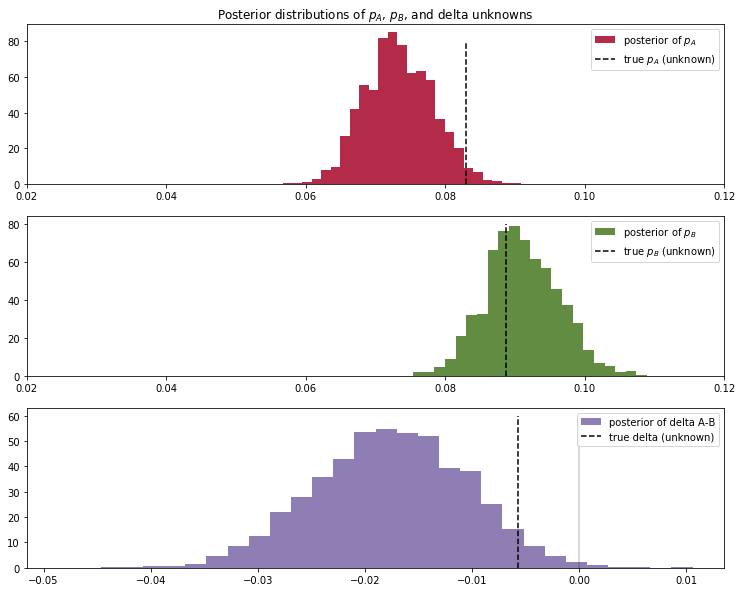

In [4]:
figsize(12.5, 10)

#histogram of posteriors

ax = plt.subplot(311)

plt.xlim(.02, .12)
plt.hist(p_A_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_A$", color="#A60628", normed=True)
plt.vlines(true_p_A, 0, 80, linestyle="--", label="true $p_A$ (unknown)")
plt.legend(loc="upper right")
plt.title("Posterior distributions of $p_A$, $p_B$, and delta unknowns")

ax = plt.subplot(312)

plt.xlim(.02, .12)
plt.hist(p_B_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_B$", color="#467821", normed=True)
plt.vlines(true_p_B, 0, 80, linestyle="--", label="true $p_B$ (unknown)")
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_A_B_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta A-B", color="#7A68A6", normed=True)
plt.vlines(true_p_A - true_p_B, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black", alpha=0.2)
plt.legend(loc="upper right");



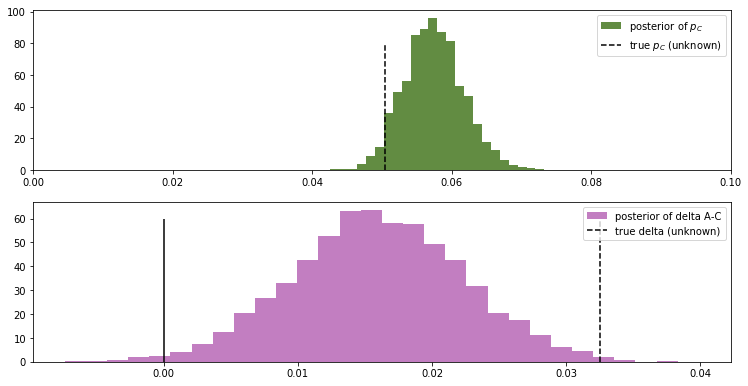

In [5]:

ax = plt.subplot(312)

plt.xlim(0, .1)
plt.hist(p_C_samples, histtype='stepfilled', bins=25, alpha=0.85,
         label="posterior of $p_C$", color="#467821", normed=True)
plt.vlines(true_p_C, 0, 80, linestyle="--", label="true $p_C$ (unknown)")
plt.legend(loc="upper right")

ax = plt.subplot(313)
plt.hist(delta_A_C_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta A-C", color="#B868B6", normed=True)
plt.vlines(true_p_A - true_p_C, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black")
plt.legend(loc="upper right");



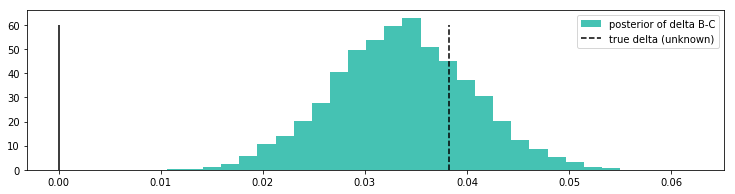

In [6]:
ax = plt.subplot(313)
plt.hist(delta_B_C_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of delta B-C", color="#24B8A6", normed=True)
plt.vlines(true_p_B - true_p_C, 0, 60, linestyle="--",
           label="true delta (unknown)")
plt.vlines(0, 0, 60, color="black")
plt.legend(loc="upper right");

In [7]:
# Count the number of samples less than 0, i.e. the area under the curve
# before 0, represent the probability that site A is worse than site B.
print("Probability site A is WORSE than site B: %.3f" % \
    np.mean(delta_A_B_samples < 0))

print("Probability site A is BETTER than site B: %.3f" % \
    np.mean(delta_A_B_samples > 0))

print("\nProbability site A is WORSE than site C: %.3f" % \
    np.mean(delta_A_C_samples < 0))

print("Probability site A is BETTER than site C: %.3f \n" % \
    np.mean(delta_A_C_samples > 0))

print("Probability site B is WORSE than site C: %.3f" % \
    np.mean(delta_B_C_samples < 0))

print("Probability site B is BETTER than site C: %.3f" % \
    np.mean(delta_B_C_samples > 0))

Probability site A is WORSE than site B: 0.995
Probability site A is BETTER than site B: 0.005

Probability site A is WORSE than site C: 0.007
Probability site A is BETTER than site C: 0.993 

Probability site B is WORSE than site C: 0.000
Probability site B is BETTER than site C: 1.000
